In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from google.colab import files
import warnings
warnings.filterwarnings(action = 'once')

%matplotlib inline  

# matplotlib.rcParams['figure.figsize'] = (10,6)
mpl.rcParams['figure.facecolor'] = 'white'
# mpl.rcParams['figure.figsize'] = (10,6)
mpl.rcParams['font.family'] = 'roboto'
mpl.rcParams['font.size'] = 18

For the privacy purpose, data path is not shown in the below file.

In [2]:
from google.colab import drive
drive.mount('content/');

# Reading the CSV file
file_path1 = '****/block_totals1920.csv'

# Converting file into DataFrane object.
power_df = pd.read_csv(file_path1)

## Converting into DateTime Object
power_df['Time'] = pd.to_datetime(power_df['Time'])
power_df.head()
print("df.shape =",power_df.shape)
power_df.head()

Mounted at content/
df.shape = (96930, 3)


,Time,block_code,power_kW
0,2020-01-01 00:00:00,A,226.3984
1,2020-01-01 00:05:00,A,220.7581
2,2020-01-01 00:10:00,A,227.4362
3,2020-01-01 00:15:00,A,222.1747
4,2020-01-01 00:20:00,A,217.8452


In [3]:
power_df.tail()

,Time,block_code,power_kW
96925,2020-12-30 23:40:00,A,202.2443
96926,2020-12-30 23:45:00,A,200.9268
96927,2020-12-30 23:50:00,A,204.1959
96928,2020-12-30 23:55:00,A,201.9925
96929,2020-12-31 00:00:00,A,205.3603


In [4]:
# Detecting Outliers 
outlier_idx = power_df[power_df.power_kW > 1000].index.values
power_df[power_df.power_kW > 1000]

,Time,block_code,power_kW
52074,2020-07-10 15:20:00,A,214813.7143
56116,2020-07-24 16:10:00,A,644395.1518
68051,2020-09-07 09:45:00,A,214836.9641
87722,2020-11-27 16:40:00,A,214957.7548
87742,2020-11-27 18:20:00,A,214995.4179
91621,2020-12-11 15:35:00,A,215033.3138
91622,2020-12-11 15:40:00,A,215029.2411
91623,2020-12-11 15:45:00,A,214852.1905
93324,2020-12-17 13:30:00,A,214952.4515
93325,2020-12-17 13:35:00,A,214968.8032


In [5]:
# Removing the outliers
power_df.drop(index = outlier_idx, axis = 0, inplace=True)

In [6]:
print("Actual size of dataset:",12*24*366)
print("missing data:",12*24*366 - len(power_df))
print(f"{(12*24*366 - len(power_df))/(12*24*366) * 100:.3f}% data is missing")

Actual size of dataset: 105408
missing data: 8488
8.053% data is missing


## Data Preprocessing

#### Data from 01-01-2020 to 31-12-2020 (366 days)

<font color = 'red'> Here 31-12-2020 data is missing </font>

In [7]:
power_df.dtypes 

Time          datetime64[ns]
block_code            object
power_kW             float64
dtype: object

### Handling missing timestamp

if Timestamp is not index of dataframe

In [8]:
min = 5

# Resampling the dataset at 5 min
power_df = power_df.resample(str(60 * min) + 'S', on = 'Time', offset = '0S').mean(); #offset will start sampling after given sec.
power_df = power_df.reset_index()
power_df.head()

,Time,power_kW
0,2020-01-01 00:00:00,226.3984
1,2020-01-01 00:05:00,220.7581
2,2020-01-01 00:10:00,227.4362
3,2020-01-01 00:15:00,222.1747
4,2020-01-01 00:20:00,217.8452


### Interpolating missing values

In [9]:
power_df.interpolate(method = 'linear', inplace = True)
print("power_df.shape = " + str(power_df.shape))

# Checking for Null values
power_df.isnull().sum()

power_df.shape = (105121, 2)


Time        0
power_kW    0
dtype: int64

In [10]:
power_df.to_csv("A-Block-2019_20.csv", index = False)

In [12]:
power_df['year'] = power_df['Time'].dt.year
power_df['month'] = power_df['Time'].dt.month
# power_df['day of week'] = power_df['Time'].dt.dayofweek
day_map = {
    0: 'Sun',
    1: 'Mon',
    2: 'Tue',
    3: 'Wed',
    4: 'Thu',
    5: 'Fri',
    6: 'Sat',
}
# power_df['day_name'] = power_df['Time'].dt.weekday.map(day_map)
print("power_df.shape =",power_df.shape)
power_df.head()

power_df.shape = (105121, 4)


,Time,power_kW,year,month
0,2020-01-01 00:00:00,226.3984,2020,1
1,2020-01-01 00:05:00,220.7581,2020,1
2,2020-01-01 00:10:00,227.4362,2020,1
3,2020-01-01 00:15:00,222.1747,2020,1
4,2020-01-01 00:20:00,217.8452,2020,1


Text(0.5, 1.0, 'A Block 2020 Load Data')

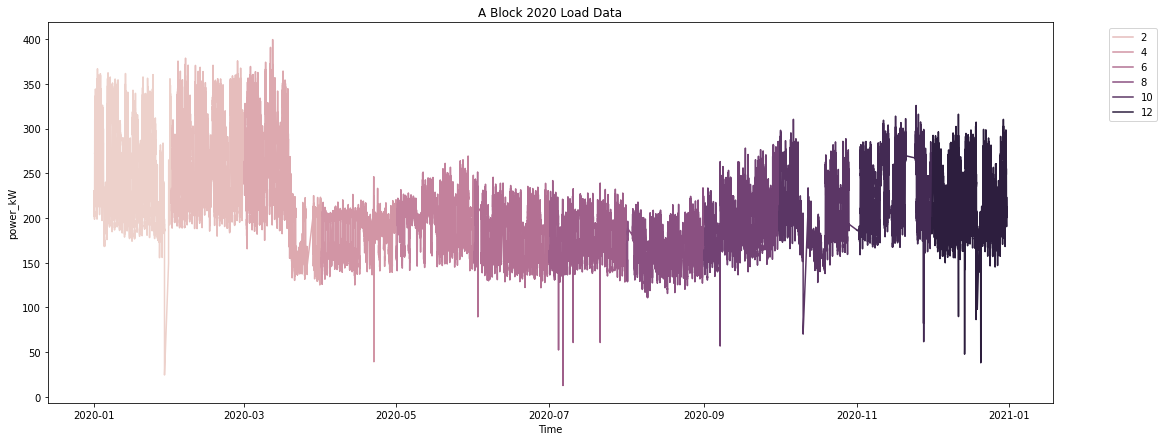

In [17]:
month_names = 'Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec'.split()
plt.figure(figsize = (18,7))
sns.lineplot(data=power_df, x = 'Time', y = 'power_kW', hue='month', )
# plt.xticks(np.arange(0,len(power_df), 30*24*12), month_names)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)
plt.title("A Block 2020 Load Data")

In [ ]:
infos = power_df.groupby(power_df.month).describe()
infos

## **Data Analysis of 01-01-2020**

In [18]:
# start_index = power_df[power_df.Time == '2020-09-17 00:00:00'].index.values[0]
tmp_df = power_df[:288] # for 1 day
tmp_df.head()

,Time,power_kW,year,month
0,2020-01-01 00:00:00,226.3984,2020,1
1,2020-01-01 00:05:00,220.7581,2020,1
2,2020-01-01 00:10:00,227.4362,2020,1
3,2020-01-01 00:15:00,222.1747,2020,1
4,2020-01-01 00:20:00,217.8452,2020,1


In [19]:
tmp_df.tail()

,Time,power_kW,year,month
283,2020-01-01 23:35:00,226.5588,2020,1
284,2020-01-01 23:40:00,228.2703,2020,1
285,2020-01-01 23:45:00,227.1070,2020,1
286,2020-01-01 23:50:00,221.2973,2020,1
287,2020-01-01 23:55:00,230.3800,2020,1


## Data Visulization

In [20]:
months = 'Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec'.split()
month_days = '31 29 31 30 31 30 31 31 30 31 30 31'.split()
month_days = list(map(int, month_days))

findfont: Font family ['roboto'] not found. Falling back to DejaVu Sans.
findfont: Font family ['roboto'] not found. Falling back to DejaVu Sans.


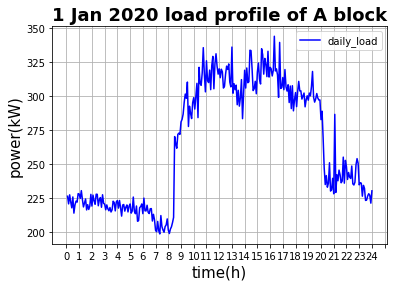

In [21]:
time_step = np.arange(1,1+len(tmp_df))
power1 = tmp_df.power_kW.values

xlab = 'time(h)'
ylab = 'power(kW)'
xvals = time_step
yvals = power1
title = "1 Jan 2020 load profile of A block"
# myplot(xvals, yvals, xlab, ylab,title)

# plt.xticks(np.linspace(0,len(power_df),), list(range(0,int(24*60/stepsize),5)))
plt.xticks(np.arange(0,24*(12+1),12), np.arange(0,24+1))
# xlab = 'Jan Feb Mar Apr May June July Aug Sep oct Nov Dec'.split() 
plt.rc('xtick',labelsize = 15)
plt.rc('ytick',labelsize = 15)

plt.plot(xvals, yvals, color='b',label = 'daily_load')
# plt.plot(xvals, yvals2, 'r--',label = 'range_max_load')
# plt.plot(xvals, yvals3, 'r--')
plt.xlabel(xlab, fontsize = 15)
plt.ylabel(ylab, fontsize = 15)
plt.title(title, fontsize = 18, fontweight = 'bold')
plt.legend()
plt.grid()
plt.show()

In [22]:
## Monthwise peak load hour calculations
threshold = 300
peak_load_time_arr = np.zeros(12)
for m in range(12):
    month_df = power_df[power_df.month == (m+1)]
    month_power = month_df.power_kW.values
    peak_load_time = len(month_power[month_power > threshold]) * 5 /60
    peak_load_time_arr[m] = peak_load_time

peak_load_df = pd.DataFrame({
    'Month' : np.arange(1,13),
    'Peak_duration(h)' : peak_load_time_arr,
    'percent_duration' : peak_load_time_arr/8760 * 100
})

print(f"Peak load duration for > {threshold}kW")
peak_load_df

Peak load duration for > 300kW


,Month,Peak_duration(h),percent_duration
0,1,154.583333,1.764650
1,2,212.166667,2.421994
2,3,136.750000,1.561073
3,4,0.000000,0.000000
4,5,0.000000,0.000000
5,6,0.000000,0.000000
6,7,0.000000,0.000000
7,8,0.000000,0.000000
8,9,0.000000,0.000000
9,10,0.083333,0.000951


## Monthwise Load Profile for A Block

In [23]:
winsummon = [
             [11,12,1,2],
             [3,4,5,6],
             [7,8,9,10]
]

Summer Season

In [24]:
month_df = power_df[power_df.month == (m+1)]
month_df.head()

,Time,power_kW,year,month
96480,2020-12-01 00:00:00,199.3930,2020,12
96481,2020-12-01 00:05:00,193.0140,2020,12
96482,2020-12-01 00:10:00,198.1404,2020,12
96483,2020-12-01 00:15:00,190.2682,2020,12
96484,2020-12-01 00:20:00,190.4245,2020,12


In [25]:
# plt.plot(month_time, month_power, label = f"{months[m-1]}")
# plt.xticks( np.arange(1,len(month_power)+1, 288), np.arange(1,32), rotation=20)
# plt.xlabel('time', fontsize=14)
# plt.ylabel('power(kW)')
# plt.title(f'{months[m-1]} Month Load Data', fontsize = 16, fontweight = 'bold')
# plt.legend()
# plt.grid()

In [26]:
plt.rc('axes', labelsize=9)    # fontsize of the x and y labels

findfont: Font family ['roboto'] not found. Falling back to DejaVu Sans.
findfont: Font family ['roboto'] not found. Falling back to DejaVu Sans.


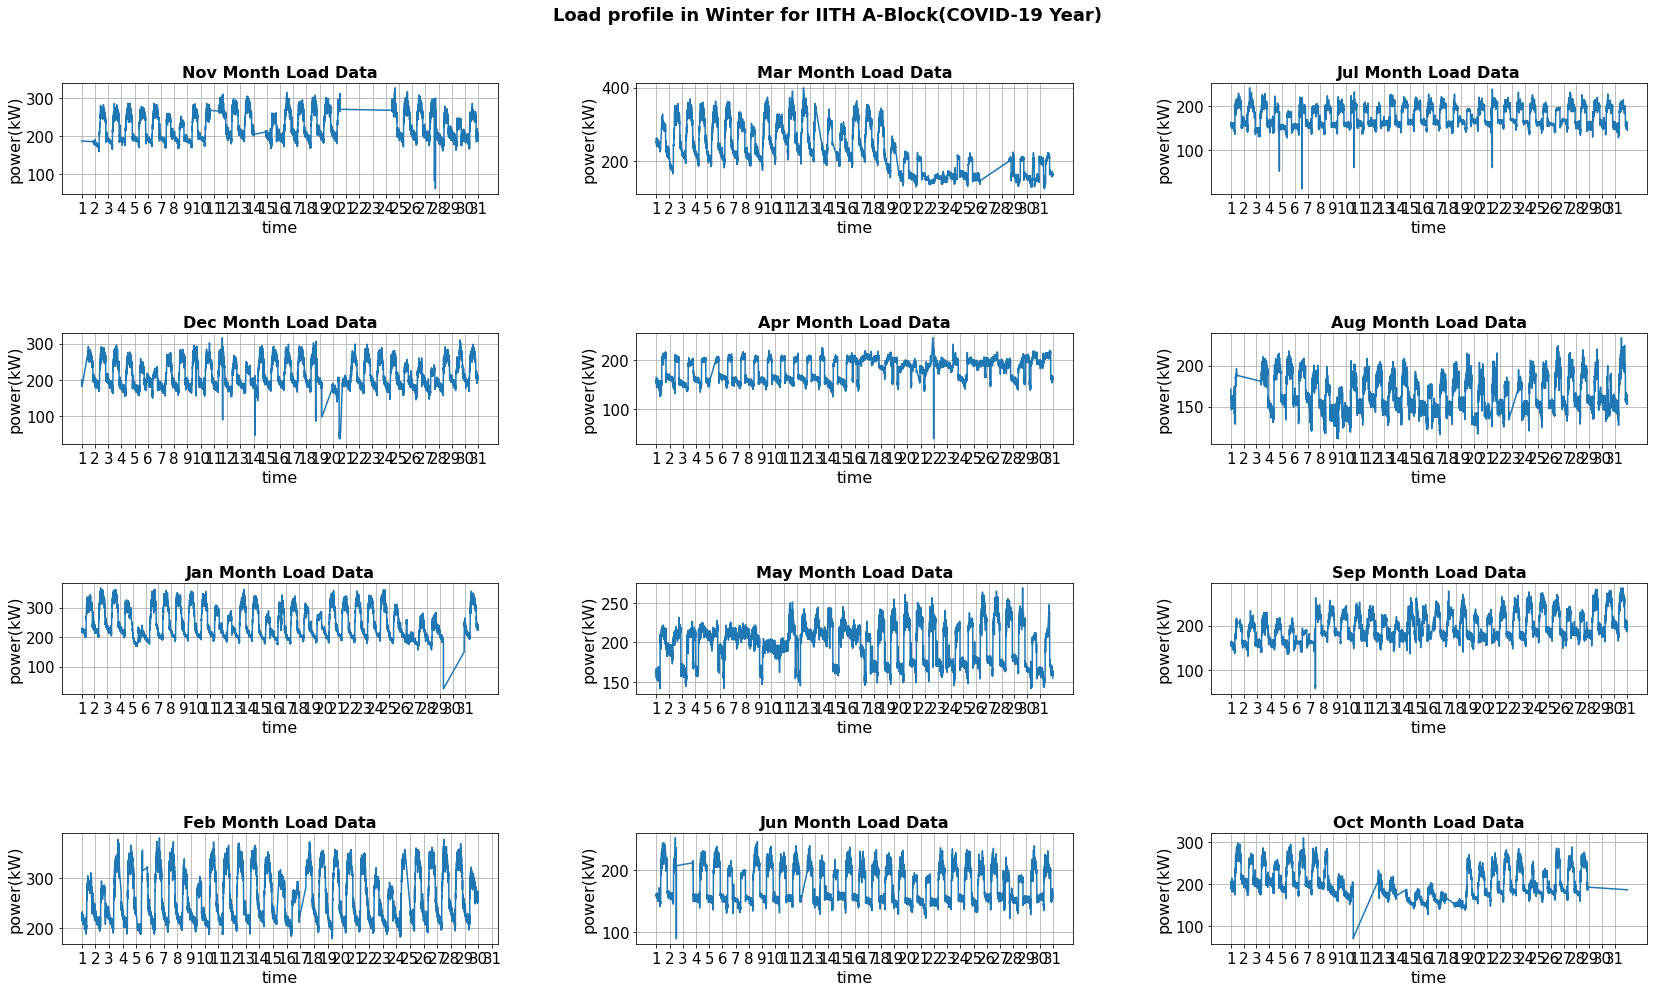

In [27]:
fig, axes = plt.subplots(4,3, figsize = (25,15))
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels

fig.suptitle('Load profile in Winter for IITH A-Block(COVID-19 Year)', fontweight = 'bold', fontsize = 18)
seasons = 'Winter Summer Monsoon'.split()
seas_num = 0 #season index
for ax, col in zip(axes[0], seasons):
    # Setting the column titles
    ax.set_title("This is column title")
    
    for i, m in enumerate(winsummon[seas_num]): #m = month in columnwise
        month_df = power_df[power_df.month == m]
        month_power = month_df.power_kW.values
        # print(f"m = {m}, {months[m-1]}: {len(month_power)//288}")
        month_time = list(range(len(month_power)))
        axes[i,seas_num].plot(month_time, month_power, label = f"{months[m-1]}")
        axes[i,seas_num].set_xticks( np.arange(1,len(month_power)+1, 288))
        axes[i,seas_num].set_xlabel('time', fontsize=16)
        axes[i,seas_num].set_ylabel('power(kW)', fontsize=16)
        axes[i,seas_num].set_title(f'{months[m-1]} Month Load Data', fontsize = 16, fontweight = 'bold')
        axes[i,seas_num].grid()
    seas_num += 1
    
# Set the ticks and ticklabels for all axes
plt.setp(axes, xticks=np.arange(1,len(month_power)+1, 288), xticklabels=np.arange(1,32))
# plt.rc('axes', labelsize=9)    # fontsize of the x and y labels

fig.tight_layout(pad=8.0)